In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fly AI/Project/top.csv')

df = pd.DataFrame(data).set_index('Player')


scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)


In [3]:
input_data = [20,11,20,50,-300]

scaled_input_data = scaler.transform([input_data])[0]
print(scaled_input_data)

[0.10638298 0.24980174 0.63185926 0.32106968 0.19506554]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [4]:
def calculate_euclidean_distance(row, input_data):
    return np.sqrt(np.sum([(row[col] - input_data[col]) ** 2 for col in input_data.keys()]))

def find_closest_player(scaled_df, scaled_gold, scaled_vs, scaled_dmg, scaled_kp, scaled_xpd):
    input_data = {
        'GOLD%': scaled_gold,
        'VS%': scaled_vs,
        'DMG%': scaled_dmg,
        'KP%': scaled_kp,
        'XPD@15': scaled_xpd
    }

    distances = scaled_df.apply(calculate_euclidean_distance, axis=1, input_data=input_data)
    similar_player = distances.idxmin()

    return similar_player

In [5]:
player_name = find_closest_player(scaled_df,
                                  scaled_input_data[0], scaled_input_data[1],
                                  scaled_input_data[2], scaled_input_data[3], scaled_input_data[4])

player_name

'Burdol'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import io

def plot_radar_chart(player_name, scaled_input_data, scaled_df, attributes):
    plt.clf()  # 그래프 출력 버퍼 지우기

    # 데이터 추출
    player_values = scaled_df.loc[player_name].tolist()
    input_values = scaled_input_data.tolist()

    # 데이터가 원을 이루도록 처리
    player_values += player_values[:1]
    input_values += input_values[:1]

    # 변수 및 라벨 설정
    num_vars = len(attributes)

    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # 그래프 그리기
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, input_values, color='blue', linewidth=2, label="Input Data")
    ax.fill(angles, input_values, color='blue', alpha=0.25)
    ax.plot(angles, player_values, color='red', linewidth=2, label=player_name)
    ax.fill(angles, player_values, color='red', alpha=0.25)

    # 그래프 형식 설정
    ax.set_yticklabels([])  # y 축 레이블 제거
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    ax.set_title(f"Radar Chart Comparison: Input Data vs. {player_name}")
    ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))

    plt.show()


<Figure size 640x480 with 0 Axes>

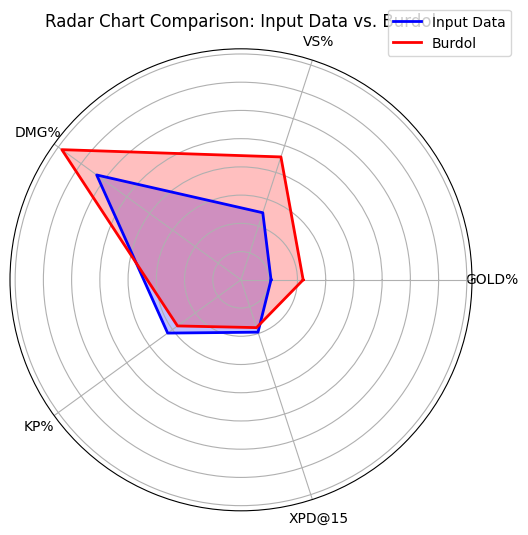

In [7]:
%matplotlib inline
attributes = list(scaled_df.columns)
plot_radar_chart("Burdol", scaled_input_data, scaled_df, attributes)